In [ ]:
'''GROUP MEMBERS
AMUZIE AUGUSTINE UCHENNA 250114676
TOHEEB ANIMASHAUN 250156274
ABIGAIL KOJO 250215009
BUSHRAH BASHIR 220224079'''

In [ ]:

'''TITLE : CAR SELLING PRICE PREDICTION USING MACHINE LEARNING

1. DATA PREPROCESSING
2. NUMERICAL AND CATEGORICAL DATA EXPLORATION
3. DATA VISUALIZATION
4. FEATURING ENGINEERING(CREATION OF NEW FEATURES)
5. FEATURE SCALING AND ENCODING
6. FEATURE AND TARGET DEFINITION
7. DATA SPLITTING
8. MODEL DEVELOPMENT
9. MODEL EVALUTION
10. FEATURE SELECTION(RECURSIVE FEATURE ELIMINATION)
11. HYPERPARAMETER TUNING

THE FINAL OBJECTIVE IS TO DEVELOP A RELIABLE MACHINE LEARNING MODEL THAT ACCURATELY PREDICTS CAR SELLING PRICES, 
WHILE MAINTAINING GOOD GENERALISATION PERFORMANCE AND INTERPRETABILITY'''

In [146]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [147]:
#EDA and preprocessing
df = pd.read_csv('CAR Price Dataset.csv')

In [148]:
#display first five rows
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner


In [149]:
#basic info about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4340 non-null   object 
 1   year           4340 non-null   int64  
 2   selling_price  4333 non-null   float64
 3   km_driven      4335 non-null   float64
 4   fuel           4340 non-null   object 
 5   seller_type    4334 non-null   object 
 6   transmission   4340 non-null   object 
 7   owner          4340 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.4+ KB


In [150]:
#Datatype and missing values
d_type = df.dtypes 
n_unique = df.nunique()
ratio_null = df.isnull().sum() / df.shape[0]
pd.DataFrame({"D_type" : d_type  , 'N_Unique' : n_unique   , "Ratio_Null" : ratio_null})

,D_type,N_Unique,Ratio_Null
name,object,1491,0.000000
year,int64,27,0.000000
selling_price,float64,445,0.001613
km_driven,float64,767,0.001152
fuel,object,5,0.000000
seller_type,object,3,0.001382
transmission,object,2,0.000000
owner,object,5,0.000000


In [151]:
#statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.0,2014.0,2016.0,2020.0
selling_price,4333.0,504158.212093,578908.863198,20000.0,210000.0,350000.0,600000.0,8900000.0
km_driven,4335.0,66230.120877,46618.590991,1.0,35000.0,60000.0,90000.0,806599.0


In [152]:
#check null values and fill
df.isnull().sum()

name             0
year             0
selling_price    7
km_driven        5
fuel             0
seller_type      6
transmission     0
owner            0
dtype: int64

In [153]:
#fill null values with median
df.fillna(df.median(numeric_only=True), inplace=True)

print(df["selling_price"].median())

350000.0


In [154]:
df['owner'] = df['owner'].str.replace(' ', '_').str.replace('&', 'and')

In [155]:
df['owner'].value_counts()

owner
First_Owner               2832
Second_Owner              1106
Third_Owner                304
Fourth_and_Above_Owner      81
Test_Drive_Car              17
Name: count, dtype: int64

In [156]:
# 1. Feature engineering first
from datetime import datetime
current_year = datetime.now().year
df['car_age'] = current_year - df['year']
df['km_per_year'] = df['km_driven'] / (df['car_age'] + 1)

df_new = df[['year', 'car_age', 'km_driven', 'km_per_year' ]]

df_new.head()

,year,car_age,km_driven,km_per_year
0,2007,18,70000.0,3684.210526
1,2007,18,50000.0,2631.578947
2,2012,13,100000.0,7142.857143
3,2017,8,46000.0,5111.111111
4,2014,11,141000.0,11750.000000


In [157]:
#Identifying Numerical and Categorical Columns
numaric_column = df.select_dtypes(include = 'number').columns
categorical_column = df.select_dtypes(include = 'object').columns
print(numaric_column)
print("-------------------------------------")
print(categorical_column)

Index(['year', 'selling_price', 'km_driven', 'car_age', 'km_per_year'], dtype='object')
-------------------------------------
Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


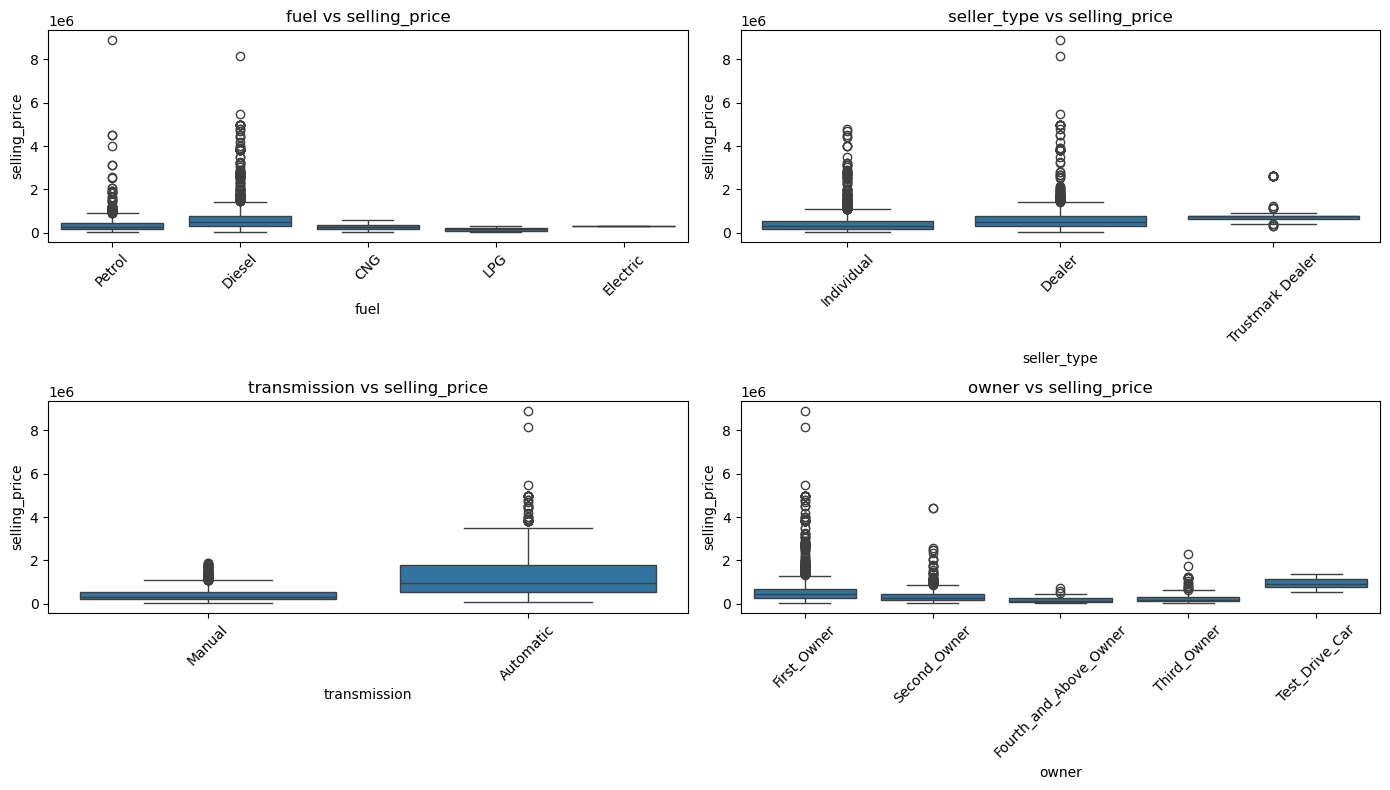

In [158]:
#Categorical Features vs. Selling Price
categorical_column = df.select_dtypes(include='object').columns.drop('name')
n = len(categorical_column) 
target = 'selling_price'

n_cols = 2
n_rows = (n + 1) // n_cols

fig , axes = plt.subplots(n_rows , n_cols , figsize = (14 , 4*n_rows))
axes = axes.flatten() 

for i , col in enumerate(categorical_column) :
    sns.boxplot(x = df[col] , y= df[target] , ax = axes[i])
    axes[i].set_title(f'{col} vs {target}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

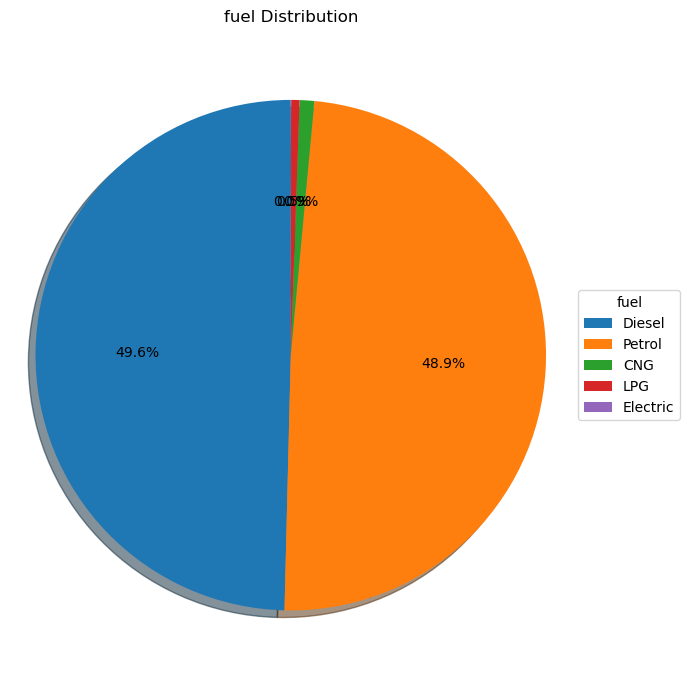

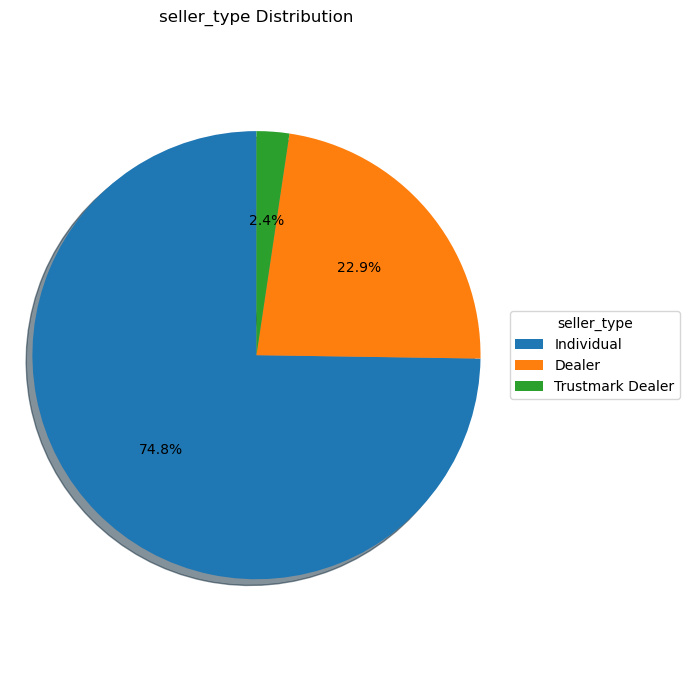

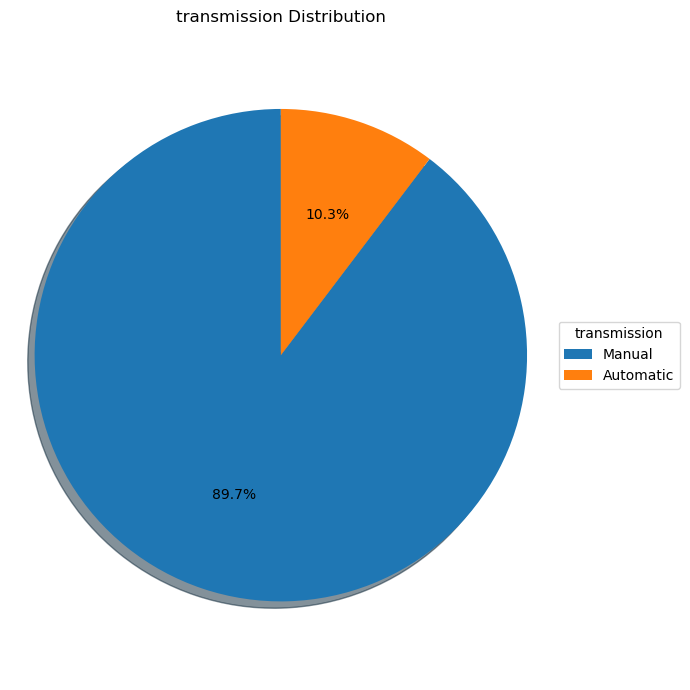

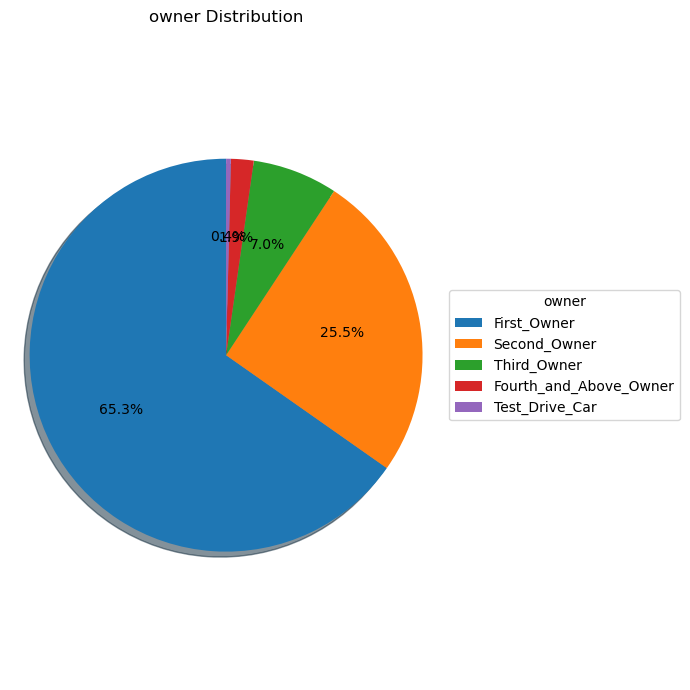

In [159]:
#Distribution of Categorical Features
for col in categorical_column:
    counts = df[col].value_counts()
    labels = counts.index
    sizes = counts.values

    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(
        sizes,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True
    )


    plt.legend(wedges, labels, title=col, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(f'{col} Distribution')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    numeric_column = df.select_dtypes(include=['int64','float64']).columns

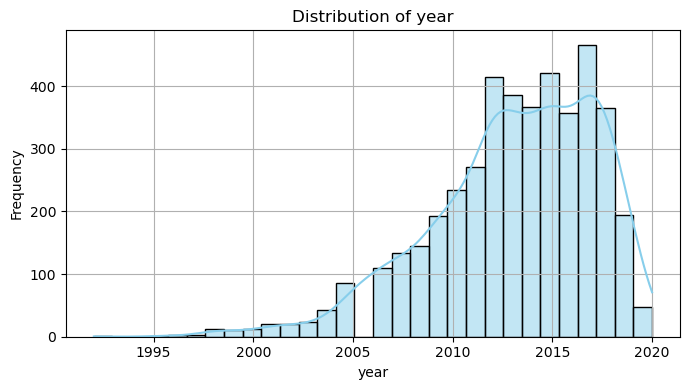

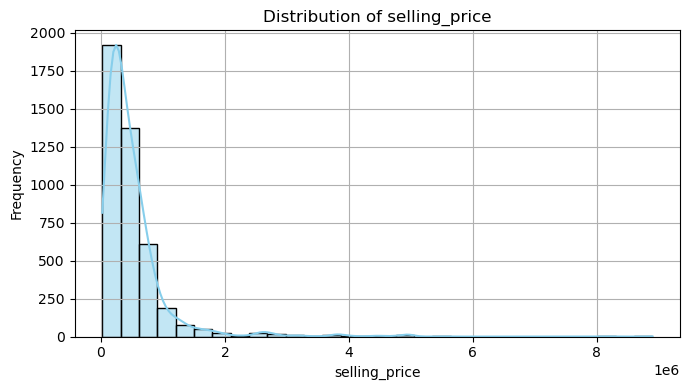

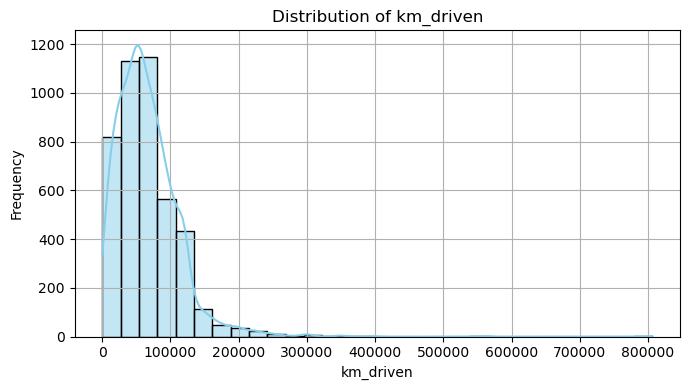

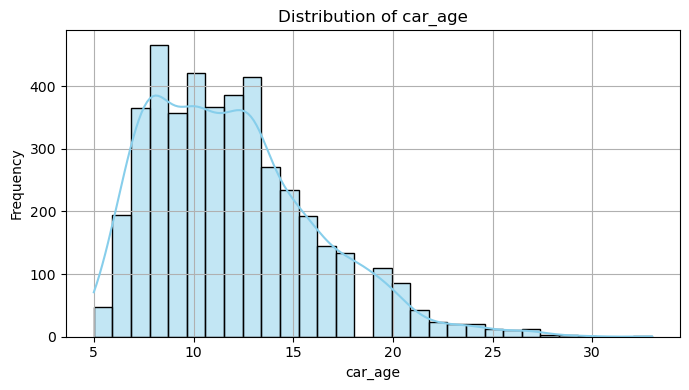

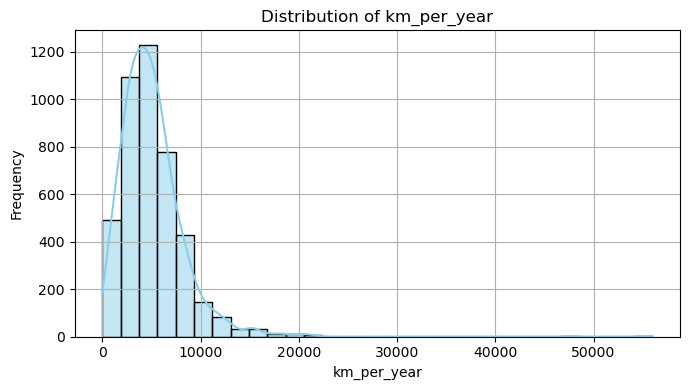

In [160]:
#Distribution of Numerical Features
for col in  numeric_column : 
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [161]:
#Mean of Numerical Features Grouped by Categorical Variables
def mean_plot(df , cat , num , axes):
    group = df.groupby(cat)
    mean = group[num].mean()
    sns.barplot(x = mean.index , y=mean  , ax = axes)
    for container in axes.containers:
        axes.bar_label(container)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

C:\Users\augustineamuzi_ysj\AppData\Local\Temp\34\ipykernel_13228\1988814887.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


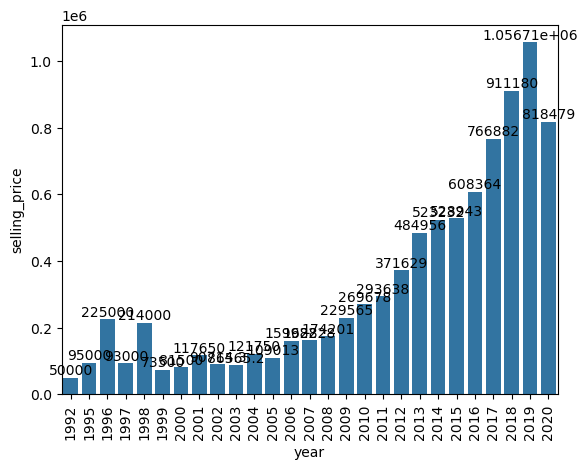

In [162]:
fig, axes = plt.subplots()
mean_plot(df, "year", "selling_price", axes)
plt.show()

C:\Users\augustineamuzi_ysj\AppData\Local\Temp\34\ipykernel_13228\1988814887.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


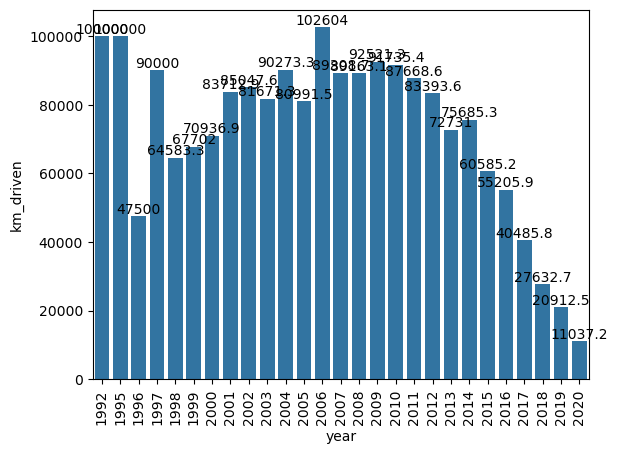

In [163]:
fig, axes = plt.subplots()
mean_plot(df, "year", "km_driven", axes)
plt.show()


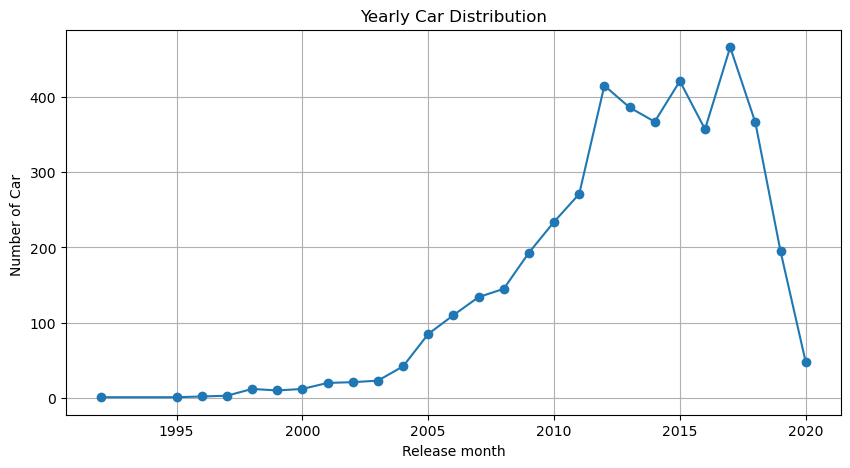

In [164]:
month_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(month_counts.index, month_counts.values, marker='o')
plt.title('Yearly Car Distribution')
plt.xlabel('Release month')
plt.ylabel('Number of Car ')
plt.grid(True)
plt.show()

<Axes: >

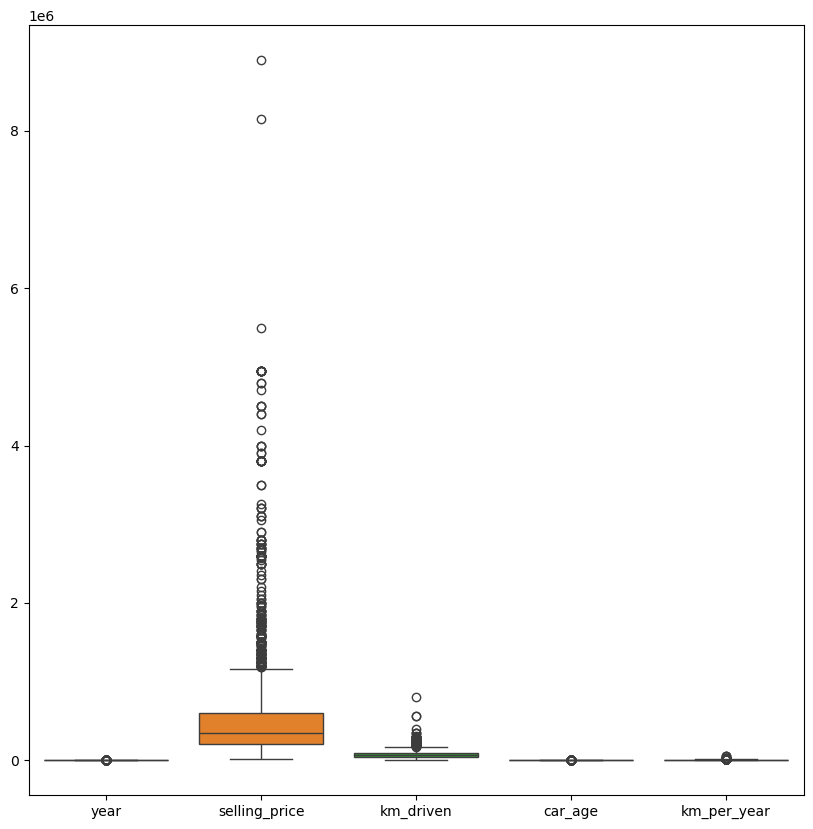

In [165]:
#Boxplot of Numerical Features to Detect Outliers
plt.figure(figsize=(10,10))
sns.boxplot(df[numaric_column])

In [166]:
#Correlation of Numerical Features with Selling Price
corr_matrix = df.select_dtypes(include = ['float64' , 'int64']).corr()

print(corr_matrix['selling_price'].sort_values(ascending= False))

selling_price    1.000000
year             0.413282
km_per_year     -0.046377
km_driven       -0.192517
car_age         -0.413282
Name: selling_price, dtype: float64


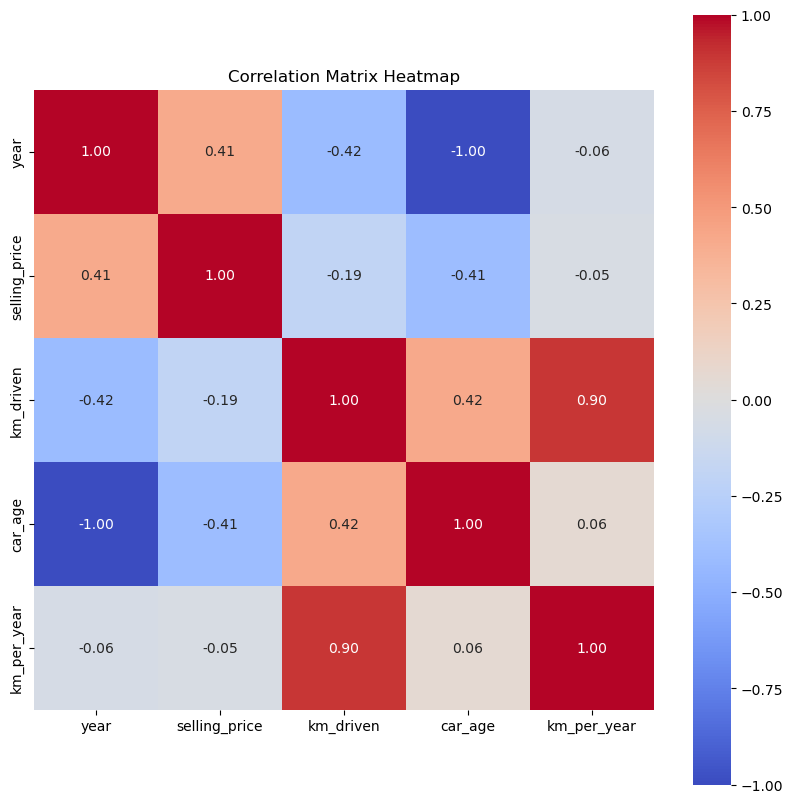

In [167]:
plt.figure(figsize=(10 , 10))
sns.heatmap(df[numaric_column].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [168]:
df['owner'].value_counts()

owner
First_Owner               2832
Second_Owner              1106
Third_Owner                304
Fourth_and_Above_Owner      81
Test_Drive_Car              17
Name: count, dtype: int64

In [169]:
#Drop Not correlated features
print(df.columns.tolist())
df = df.drop(columns=[col for col in ['name'] if col in df.columns])
print(df.columns.tolist())

['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'car_age', 'km_per_year']
['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'car_age', 'km_per_year']


In [170]:
cols_to_drop = ['name']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors='ignore')

In [171]:
#Handling Outliers in Selling Price Using IQR Clipping
q1 = df['selling_price'].quantile(0.25)
q3 = df['selling_price'].quantile(0.75)

iqr = q3 - q1
upper_bound =  q3 + 1.5 * iqr 
lower_bound =  q1 - 1.5 * iqr

df['selling_price'] = df['selling_price'].clip(lower=lower_bound, upper=upper_bound)

In [175]:
from sklearn.preprocessing import StandardScaler

# create scaler
num_cols = ['selling_price','km_driven', 'year', 'car_age', 'km_per_year']
scaler = StandardScaler()
standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[num_cols] = standard_scaler.fit_transform(df[num_cols])

# -------------------------------
# 2. Min-Max Normalization
# -------------------------------
minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[num_cols] = minmax_scaler.fit_transform(df[num_cols])

# Display first few rows
print("Standardized Data:")
print(df_standardized.head())

print("\nNormalized Data:")
print(df_normalized.head())


Standardized Data:
       year  selling_price  km_driven    fuel seller_type transmission  \
0 -1.445074      -1.242382   0.081076  Petrol  Individual       Manual   
1 -1.445074      -0.998238  -0.348230  Petrol  Individual       Manual   
2 -0.258795       0.515457   0.725034  Diesel  Individual       Manual   
3  0.927485      -0.623883  -0.434091  Petrol  Individual       Manual   
4  0.215717       0.027168   1.605111  Diesel  Individual       Manual   

          owner   car_age  km_per_year  
0   First_Owner  1.445074    -0.419495  
1   First_Owner  1.445074    -0.739250  
2   First_Owner  0.258795     0.631128  
3   First_Owner -0.927485     0.013950  
4  Second_Owner -0.215717     2.030627  

Normalized Data:
       year  selling_price  km_driven    fuel seller_type transmission  \
0  0.535714       0.034335   0.086783  Petrol  Individual       Manual   
1  0.535714       0.098712   0.061988  Petrol  Individual       Manual   
2  0.714286       0.497854   0.123976  Diesel  Ind

In [176]:
#feature selection for modeling

X = df_standardized.drop(columns="selling_price", axis=1)
y = df_standardized["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test


,year,km_driven,fuel,seller_type,transmission,owner,car_age,km_per_year
3978,-0.733307,0.295729,Diesel,Individual,Manual,First_Owner,0.733307,-0.019802
1448,1.401997,-0.841932,Petrol,Individual,Manual,First_Owner,-1.401997,-0.366964
2664,-1.207818,-0.525898,Petrol,Individual,Manual,Second_Owner,1.207818,-0.834522
17,0.215717,1.605111,Diesel,Individual,Manual,Second_Owner,-0.215717,2.030627
1634,0.690229,-0.133577,Diesel,Individual,Automatic,Second_Owner,-0.690229,0.283966
...,...,...,...,...,...,...,...,...
3468,-1.445074,-0.133577,Petrol,Individual,Manual,Third_Owner,1.445074,-0.579373
3164,0.452973,1.154340,Diesel,Individual,Manual,First_Owner,-0.452973,1.775186
416,-0.496051,-0.562883,Diesel,Individual,Manual,Second_Owner,0.496051,-0.728592
1616,0.927485,-1.282400,Petrol,Trustmark Dealer,Manual,First_Owner,-0.927485,-1.319925


In [177]:
X_test.shape

(868, 8)

In [178]:
y_test

3978   -0.900580
1448   -0.623883
2664   -1.047067
17      0.027168
1634    0.938640
          ...   
3468   -1.014514
3164   -0.298358
416    -0.949409
1616    0.678220
2480    0.434076
Name: selling_price, Length: 868, dtype: float64

In [179]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# -----------------------------
# 1) Target and features
# -----------------------------
y = df["selling_price"]
X = df.drop(columns=["selling_price"])

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# -----------------------------
# 2) Preprocessing
# -----------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_features),
    ]
)

# -----------------------------
# 3) Pipelines (Preprocessing + Model)
# -----------------------------

# Model 1: Multiple Linear Regression
mlr_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

# Model 2: Support Vector Regression
svr_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", SVR(kernel="rbf"))
])

# Model 3: Random Forest Regression
rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=300,
        random_state=42
    ))
])

# Model 4: K-Nearest Neighbors Regression
knn_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", KNeighborsRegressor(
        n_neighbors=5,
        weights="distance"
    ))
])

# Model 5: Gradient Boosting Regression
gbr_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

# -----------------------------
# 4) Train (fit) the models
# -----------------------------
mlr_pipeline.fit(X, y)
svr_pipeline.fit(X, y)
rf_pipeline.fit(X, y)
knn_pipeline.fit(X, y)
gbr_pipeline.fit(X, y)

print("Five machine learning models have been developed successfully:")
print("1) Multiple Linear Regression")
print("2) Support Vector Regression (SVR)")
print("3) Random Forest Regression")
print("4) K-Nearest Neighbors Regression")
print("5) Gradient Boosting Regression")


Five machine learning models have been developed successfully:
1) Multiple Linear Regression
2) Support Vector Regression (SVR)
3) Random Forest Regression
4) K-Nearest Neighbors Regression
5) Gradient Boosting Regression


In [180]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import (make_scorer, mean_squared_error, mean_absolute_error, r2_score)
scoring = {
    "RMSE": make_scorer(mean_squared_error, squared=False),
    "MAE": make_scorer(mean_absolute_error),
    "R2": make_scorer(r2_score)
}

kfold = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

#MULTIPLE LINEAR REGRESSION
mlr_cv = cross_validate(
    mlr_pipeline,
    X,
    y,
    cv=kfold,
    scoring=scoring,
    return_train_score=False
)

print("Multiple Linear Regression Performance:")
print(f"RMSE: {mlr_cv['test_RMSE'].mean():.2f}")
print(f"MAE : {mlr_cv['test_MAE'].mean():.2f}")
print(f"R²  : {mlr_cv['test_R2'].mean():.2f}")
print("-" * 40)



Multiple Linear Regression Performance:
RMSE: 196467.80
MAE : 149757.11
R²  : 0.59
----------------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  w

In [181]:
svr_cv = cross_validate(
    svr_pipeline,
    X,
    y,
    cv=kfold,
    scoring=scoring,
    return_train_score=False
)

print("Support Vector Regression Performance:")
print(f"RMSE: {svr_cv['test_RMSE'].mean():.2f}")
print(f"MAE : {svr_cv['test_MAE'].mean():.2f}")
print(f"R²  : {svr_cv['test_R2'].mean():.2f}")
print("-" * 40)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  w

Support Vector Regression Performance:
RMSE: 319962.20
MAE : 238535.37
R²  : -0.09
----------------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [182]:
rf_cv = cross_validate(
    rf_pipeline,
    X,
    y,
    cv=kfold,
    scoring=scoring,
    return_train_score=False
)

print("Random Forest Regression Performance:")
print(f"RMSE: {rf_cv['test_RMSE'].mean():.2f}")
print(f"MAE : {rf_cv['test_MAE'].mean():.2f}")
print(f"R²  : {rf_cv['test_R2'].mean():.2f}")
print("-" * 40)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  w

Random Forest Regression Performance:
RMSE: 179982.08
MAE : 122663.28
R²  : 0.66
----------------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [183]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score


In [184]:
scoring = {
    "RMSE": make_scorer(mean_squared_error, squared=False),
    "MAE": make_scorer(mean_absolute_error),
    "R2": make_scorer(r2_score)
}

knn_cv = cross_validate(
    knn_pipeline,
    X,
    y,
    cv=kfold,
    scoring=scoring
)

knn_rmse = knn_cv["test_RMSE"].mean()
knn_mae  = knn_cv["test_MAE"].mean()
knn_r2   = knn_cv["test_R2"].mean()

print("K-Nearest Neighbors Regression Performance")
print(f"RMSE: {knn_rmse:.3f}")
print(f"MAE : {knn_mae:.3f}")
print(f"R²  : {knn_r2:.3f}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  w

K-Nearest Neighbors Regression Performance
RMSE: 185673.430
MAE : 120349.761
R²  : 0.634


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [185]:
gbr_cv = cross_validate(
    gbr_pipeline,
    X,
    y,
    cv=kfold,
    scoring=scoring
)

gbr_rmse = gbr_cv["test_RMSE"].mean()
gbr_mae  = gbr_cv["test_MAE"].mean()
gbr_r2   = gbr_cv["test_R2"].mean()

print("Gradient Boosting Regression Performance")
print(f"RMSE: {gbr_rmse:.3f}")
print(f"MAE : {gbr_mae:.3f}")
print(f"R²  : {gbr_r2:.3f}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  w

Gradient Boosting Regression Performance
RMSE: 177056.351
MAE : 127332.802
R²  : 0.667


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [186]:
#MODEL EVALUATION

scoring = {
    "RMSE": make_scorer(mean_squared_error, squared=False),
    "MAE": make_scorer(mean_absolute_error),
    "R2": make_scorer(r2_score)
}

kfold = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

#MULTIPLE LINEAR REGRESSION 
mlr_cv = cross_validate(
    mlr_pipeline,
    X,
    y,
    cv=kfold,
    scoring=scoring
)

mlr_rmse = mlr_cv["test_RMSE"].mean()
mlr_mae  = mlr_cv["test_MAE"].mean()
mlr_r2   = mlr_cv["test_R2"].mean()

print("Multiple Linear Regression Performance")
print(f"RMSE: {mlr_rmse:.3f}")
print(f"MAE : {mlr_mae:.3f}")
print(f"R²  : {mlr_r2:.3f}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  w

Multiple Linear Regression Performance
RMSE: 196467.797
MAE : 149757.109
R²  : 0.590


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [187]:
svr_cv = cross_validate(
    svr_pipeline,
    X,
    y,
    cv=kfold,
    scoring=scoring
)

svr_rmse = svr_cv["test_RMSE"].mean()
svr_mae  = svr_cv["test_MAE"].mean()
svr_r2   = svr_cv["test_R2"].mean()

print("Support Vector Regression Performance")
print(f"RMSE: {svr_rmse:.3f}")
print(f"MAE : {svr_mae:.3f}")
print(f"R²  : {svr_r2:.3f}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  w

Support Vector Regression Performance
RMSE: 319962.203
MAE : 238535.368
R²  : -0.085


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [188]:
rf_cv = cross_validate(
    rf_pipeline,
    X,
    y,
    cv=kfold,
    scoring=scoring
)

rf_rmse = rf_cv["test_RMSE"].mean()
rf_mae  = rf_cv["test_MAE"].mean()
rf_r2   = rf_cv["test_R2"].mean()

print("Random Forest Regression Performance")
print(f"RMSE: {rf_rmse:.3f}")
print(f"MAE : {rf_mae:.3f}")
print(f"R²  : {rf_r2:.3f}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  w

Random Forest Regression Performance
RMSE: 179982.079
MAE : 122663.283
R²  : 0.656


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [189]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)
knn_pipeline.fit(X_train, y_train)

y_pred_knn = knn_pipeline.predict(X_test)

knn_rmse = mean_squared_error(y_test, y_pred_knn, squared=False)
knn_mae  = mean_absolute_error(y_test, y_pred_knn)
knn_r2   = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors Regression Evaluation")
print(f"RMSE: {knn_rmse:.3f}")
print(f"MAE : {knn_mae:.3f}")
print(f"R²  : {knn_r2:.3f}")


K-Nearest Neighbors Regression Evaluation
RMSE: 189176.322
MAE : 123974.501
R²  : 0.619


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [190]:
gbr_pipeline.fit(X_train, y_train)

y_pred_gbr = gbr_pipeline.predict(X_test)


gbr_rmse = mean_squared_error(y_test, y_pred_gbr, squared=False)
gbr_mae  = mean_absolute_error(y_test, y_pred_gbr)
gbr_r2   = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regression Evaluation")
print(f"RMSE: {gbr_rmse:.3f}")
print(f"MAE : {gbr_mae:.3f}")
print(f"R²  : {gbr_r2:.3f}")


Gradient Boosting Regression Evaluation
RMSE: 175514.612
MAE : 126140.561
R²  : 0.672


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [191]:
#USING RECURSIVE FEATURE ELIMINATION(RFE)
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

ridge_estimator = Ridge(alpha=1.0)

rfecv = RFECV(
    estimator=ridge_estimator,
    step=1,
    cv=5,
    scoring=make_scorer(mean_squared_error, squared=False),
    n_jobs=-1
)

rfecv_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("feature_selection", rfecv)
])

rfecv_pipeline.fit(X, y)

# Get feature names after preprocessing
feature_names = rfecv_pipeline.named_steps["preprocess"].get_feature_names_out()

# Boolean mask of selected features
selected_mask = rfecv_pipeline.named_steps["feature_selection"].support_

# Selected features
selected_features = feature_names[selected_mask]

print(f"Number of selected features: {len(selected_features)}")
print("Most important features:")
for feature in selected_features:
    print(feature)

Number of selected features: 1
Most important features:
cat__owner_Test_Drive_Car


In [192]:
from sklearn.model_selection import GridSearchCV
rmse_scorer = make_scorer(mean_squared_error, squared=False)

knn_param_grid = {
    "model__n_neighbors": [3, 5, 7, 9, 11],
    "model__weights": ["uniform", "distance"],
    "model__p": [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

knn_grid = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=knn_param_grid,
    scoring=rmse_scorer,
    cv=5,
    n_jobs=-1
)

knn_grid.fit(X, y)

print("Best KNN Parameters:")
print(knn_grid.best_params_)

print(f"Best KNN RMSE: {knn_grid.best_score_:.3f}")


Best KNN Parameters:
{'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'uniform'}
Best KNN RMSE: 196789.518


In [193]:
gbr_param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__learning_rate": [0.05, 0.1, 0.2],
    "model__max_depth": [2, 3, 4],
    "model__subsample": [0.8, 1.0]
}

gbr_grid = GridSearchCV(
    estimator=gbr_pipeline,
    param_grid=gbr_param_grid,
    scoring=rmse_scorer,
    cv=5,
    n_jobs=-1
)

gbr_grid.fit(X, y)

print("Best Gradient Boosting Parameters:")
print(gbr_grid.best_params_)

print(f"Best Gradient Boosting RMSE: {gbr_grid.best_score_:.3f}")

best_knn_model = knn_grid.best_estimator_
best_gbr_model = gbr_grid.best_estimator_


Best Gradient Boosting Parameters:
{'model__learning_rate': 0.05, 'model__max_depth': 2, 'model__n_estimators': 100, 'model__subsample': 1.0}
Best Gradient Boosting RMSE: 182422.245
